In [1]:
include("../src/iTEBD.jl")
using Main.iTEBD, LinearAlgebra, DelimitedFiles, Printf
data = readdlm("Ent_Z2.dat")
t = data[1:201,1]
s = data[1:201,2];

## PXP

In [4]:
# Gate
P = [0 0; 0 1]
X = [0 1; 1 0]
PXP = kron(P,X,P)
dt = 0.02
G = exp(-1im*dt*PXP)

# Z2 initial state
z2 = begin
    v = [[0, 1], [1,0], [0, 1], [1,0]]
    product_iMPS(ComplexF64, v)
end

# Entanglement
S = zeros(201)
for i=2:201
    for j=1:5
        applygate!(z2, G, 1,3, maxdim=128)
        applygate!(z2, G, 2,4, maxdim=128)
        applygate!(z2, G, 3,1, maxdim=128)
        applygate!(z2, G, 4,2, maxdim=128)
    end
    EE = iTEBD.ent_S(z2, 1)
    if mod(i-1, 10) == 0
        @printf("t = %.1f, S = %.5f.\n", 0.1*(i-1), EE)
    end
    S[i] = EE
end

t = 1.0, S = 0.11087.
t = 2.0, S = 0.08904.
t = 3.0, S = 0.13280.
t = 4.0, S = 0.22759.
t = 5.0, S = 0.25301.
t = 6.0, S = 0.37113.
t = 7.0, S = 0.37203.
t = 8.0, S = 0.44488.
t = 9.0, S = 0.49449.
t = 10.0, S = 0.53811.
t = 11.0, S = 0.63265.
t = 12.0, S = 0.66143.
t = 13.0, S = 0.75339.
t = 14.0, S = 0.78418.
t = 15.0, S = 0.85210.
t = 16.0, S = 0.90572.
t = 17.0, S = 0.94977.
t = 18.0, S = 1.03404.
t = 19.0, S = 1.07081.
t = 20.0, S = 1.15848.


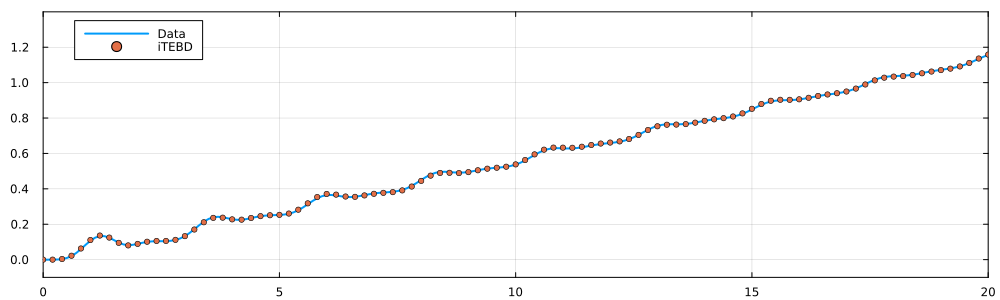

In [13]:
using Plots
plot(t, s, linewidth=2, xlims=(0,20), ylims=(-0.1,1.4), frame=:box, label="Data", size=(1000,300))
scatter!(t[1:2:end], S[1:2:end], linewidth=2, label="iTEBD", markersize=3)